# Mathematical Transformations

**Transformation are used to make data more normal, reduce skeweness, stabilize variance and improve model performance (especially for linear Models).**

There are Three mathematical Transformation : 

1. **Function Transformations**

        a. log Transformer
        b. Reciprocal Transformer
        c. sqrt Transformer
        d. Custom Transformer

2. **Power Transformations**
   
        a. Box-Cox Transformer
        b. Yeo - Johnson Transformer

3. **Quantile Transformations**

# Dataset to implement transformations

In [56]:
# Loading Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:

# 1. Skewed positive values (for log/Box-Cox)
skewed = np.random.exponential(scale=2, size=100)

# 2. Positive + Negative values (for Yeo-Johnson)
mixed = np.random.normal(loc=0, scale=2, size=100)   # can be -ve or +ve

# 3. Values with zeros (to check log1p or safe transforms)
zeros = np.random.randint(-2, 3, size=100)           # includes -2, -1, 0, 1, 2

# 4. Feature with outliers (for quantile transformer)
outliers = np.random.normal(0, 1, 95).tolist() + [20, 30, -25, -30, 50]

# Put all into a DataFrame
df = pd.DataFrame({
    "skewed": skewed,
    "mixed": mixed,
    "zeros": zeros,
    "outliers": outliers
})

In [58]:
df.head()

,skewed,mixed,zeros,outliers
0,1.595590,2.496960,0,0.655652
1,0.239277,-0.520614,-1,-0.519213
2,0.267463,1.772510,2,1.507016
3,1.552958,0.962784,0,0.943802
4,2.005868,3.657763,1,-0.099437


# 1. Function Transformers

**In function transformers we directly apply mathematical functions directly**.

* we can import FunctionTransformer class from sklearn.preprocessing module

In [60]:
from sklearn.preprocessing import FunctionTransformer

## a. log transformation

* We use log transformation with **positive** and **skewed** data.
* It makes data more normal by applying log function.

In [18]:
# Creating object for log transformer
logTransformer = FunctionTransformer(np.log1p)

# Applying log transformer
skewed_transformed = logTransformer.fit_transform(df['skewed'])

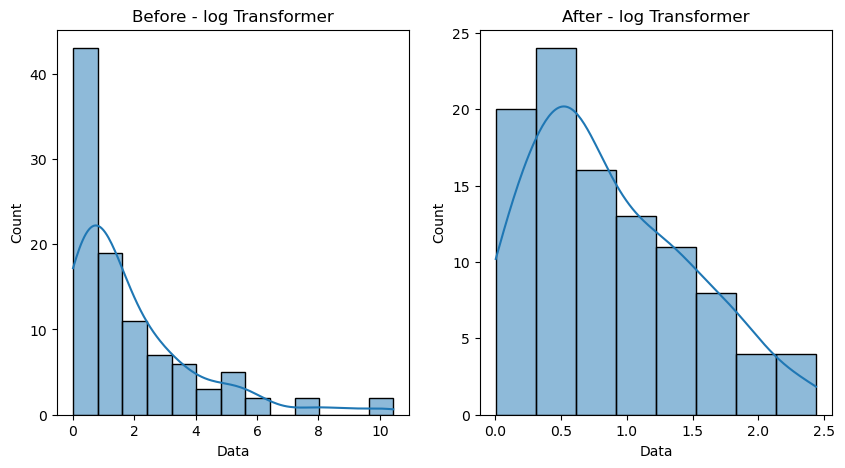

In [27]:
# Histplot - Before and after log transformation

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.histplot(df['skewed'].values, kde = True)
plt.title("Before - log Transformer")
plt.xlabel("Data")

plt.subplot(1,2,2)
sns.histplot(skewed_transformed, kde = True)
plt.title("After - log Transformer")
plt.xlabel("Data")

plt.show()

## b. Reciprocal Transformation

* It is used to flip large values into small values.
* Mostly used when large values dominates most.

In [29]:
# Creating object for reciprocal transformation
reciprocalTransformer = FunctionTransformer(lambda x : 1/x)

# Applying reciproval transformation
reciprocal_transformed = reciprocalTransformer.fit_transform(df['skewed'])

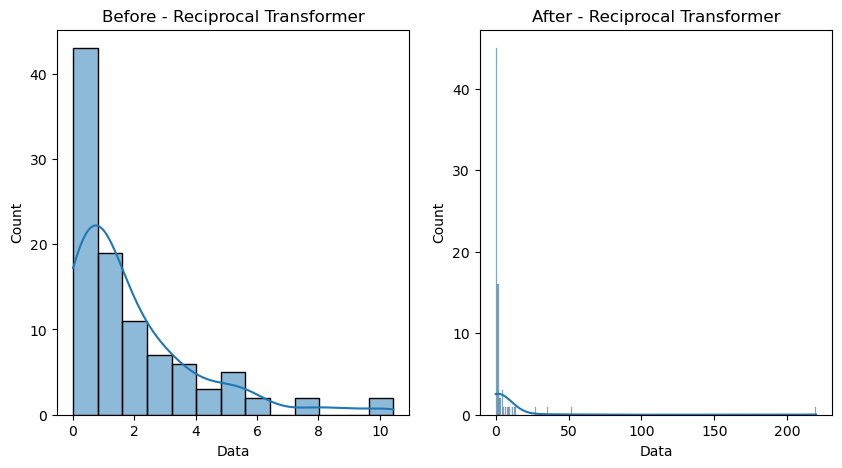

In [30]:
# Histplot - Before and after Reciprocal transformation

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.histplot(df['skewed'].values, kde = True)
plt.title("Before - Reciprocal Transformer")
plt.xlabel("Data")

plt.subplot(1,2,2)
sns.histplot(reciprocal_transformed, kde = True)
plt.title("After - Reciprocal Transformer")
plt.xlabel("Data")

plt.show()

## c. sqrt Transformation

* sqrt tarnsformation is similar to the log transformation but it can handle both **positive** and **zero**.
* It convert to moderate guassian and data must be **non-negative**.


In [33]:
# Creating object for sqrt transformation
sqrtTransformer = FunctionTransformer(np.sqrt)

# Applying sqrt transformation
sqrt_transformed = sqrtTransformer.fit_transform(df['skewed'])

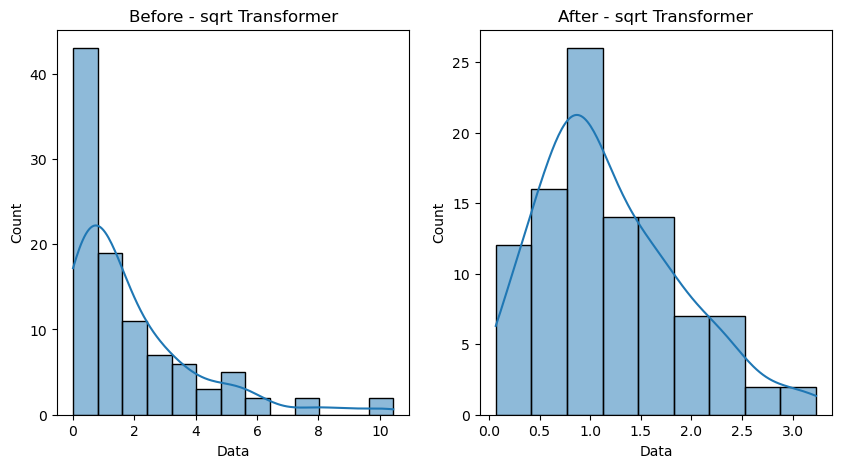

In [34]:
# Histplot - Before and after sqrt transformation

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.histplot(df['skewed'].values, kde = True)
plt.title("Before - sqrt Transformer")
plt.xlabel("Data")

plt.subplot(1,2,2)
sns.histplot(sqrt_transformed, kde = True)
plt.title("After - sqrt Transformer")
plt.xlabel("Data")

plt.show()

## d. Custom Transformation

* Custom Transformation is used to create different mathematical transformation on our own and based on our need.

In [35]:
# Creating objcet for custom Transformer (x**2)
customTransformer = FunctionTransformer(lambda x : x**2)

# applying custom transformer (x**2)
custom_transformed = customTransformer.fit_transform(df['mixed'])

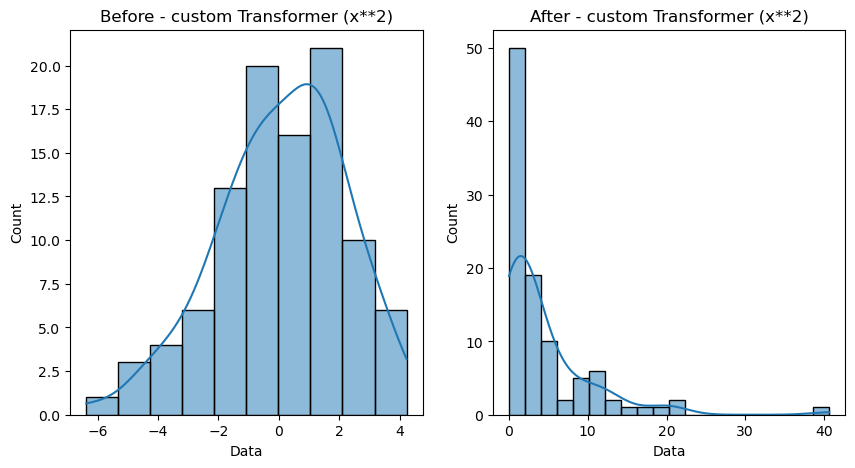

In [36]:
# Histplot - Before and after custom transformation(x**2)

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.histplot(df['mixed'].values, kde = True)
plt.title("Before - custom Transformer (x**2)")
plt.xlabel("Data")

plt.subplot(1,2,2)
sns.histplot(custom_transformed, kde = True)
plt.title("After - custom Transformer (x**2)")
plt.xlabel("Data")

plt.show()

# 2. Power Transformers

**Power Transformers automatically applies transformations to stabilize variance and makes data more guassian-like.Unlike other transformations power transformations learns from data applys the best transformation for different data**.

* we can import PowerTransform class from sklearn.preprocessing module.

In [41]:
from sklearn.preprocessing import PowerTransformer

## a. Box-Cox Transformer

* Box-Cox only works with **postive data**.
* It applies power parameter **λ**(learned from data) to transform.
* It gets λ through **log-likelihood** (a statistical measure of how close the transformed data is to normal distribution).

In [46]:
# Creating object for box-cox transformer
boxcoxTransformer = PowerTransformer(method = 'box-cox',standardize = False)

# Applying box-cox transformer
boxcox_transformed = boxcoxTransformer.fit_transform(df['skewed'].values.reshape(-1,1))

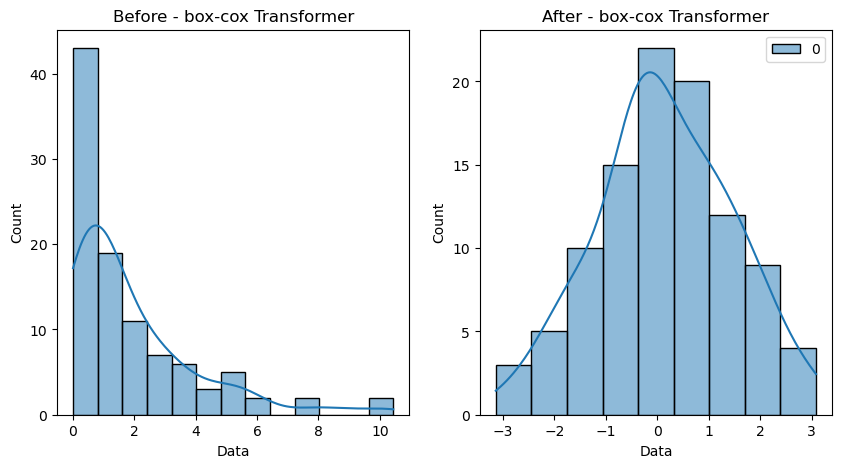

In [47]:
# Histplot - Before and after box-cox transformation

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.histplot(df['skewed'].values, kde = True)
plt.title("Before - box-cox Transformer")
plt.xlabel("Data")

plt.subplot(1,2,2)
sns.histplot(boxcox_transformed, kde = True)
plt.title("After - box-cox Transformer")
plt.xlabel("Data")

plt.show()

## b. Yeo-Johnson Transformer

* Yeo - Johnson is an exetension of box-cox and works with both **positive** and **negative** data.
* It applies power parameter **λ**(learned from data) to transform.
* It gets λ through **log-likelihood** (a statistical measure of how close the transformed data is to normal distribution).

In [48]:
# Creating object for box-cox transformer
yeojhonsonTransformer = PowerTransformer(method = 'yeo-johnson',standardize = False)

# Applying box-cox transformer
yeojohnson_transformed = yeojhonsonTransformer.fit_transform(df['mixed'].values.reshape(-1,1))

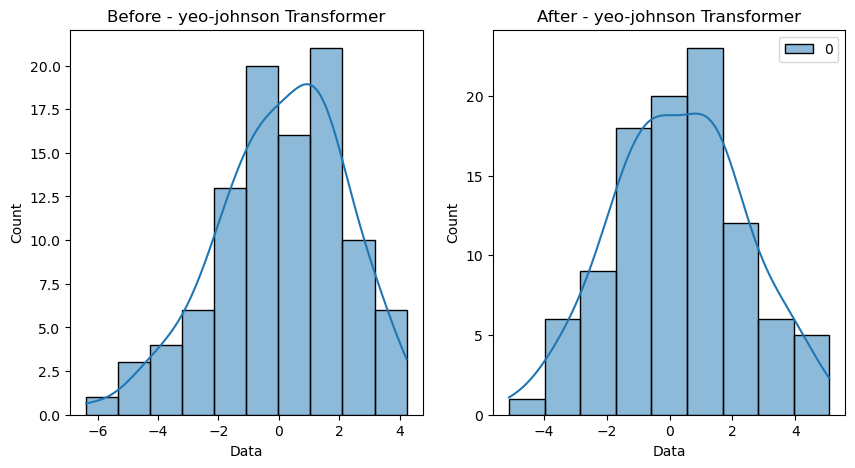

In [49]:
# Histplot - Before and after yeo-johnson transformation

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.histplot(df['mixed'].values, kde = True)
plt.title("Before - yeo-johnson Transformer")
plt.xlabel("Data")

plt.subplot(1,2,2)
sns.histplot(yeojohnson_transformed, kde = True)
plt.title("After - yeo-johnson Transformer")
plt.xlabel("Data")

plt.show()

# 3. Quantile Transformers

**These make data follow a uniform or normal distribution.**

* Idea: Rank the data, then map it to a target distribution.
* Good for removing outliers effect.
* But can distort relationships if dataset is small.
* We can import QuantileTransformer class from sklearn.preprocessing module.

In [50]:
from sklearn.preprocessing import QuantileTransformer

In [53]:
# object for quantile transformers - Uniform Distribution
quantileTransformerUniform = QuantileTransformer(output_distribution = 'uniform',n_quantiles = len(df['outliers']))

# Applying quantile transformation
quantile_transformed = quantileTransformerUniform.fit_transform(df['outliers'].values.reshape(-1,1))

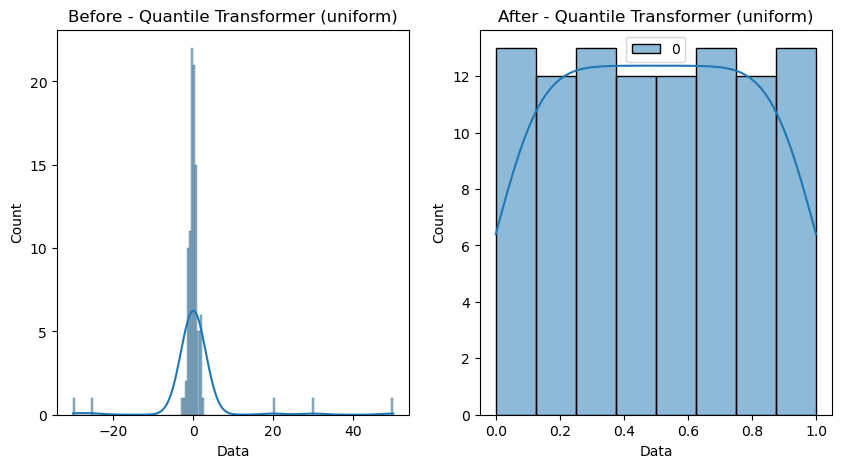

In [55]:
# Histplot - Before and after Quantile transformation(uniform)

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.histplot(df['outliers'].values, kde = True)
plt.title("Before - Quantile Transformer (uniform)")
plt.xlabel("Data")

plt.subplot(1,2,2)
sns.histplot(quantile_transformed, kde = True)
plt.title("After - Quantile Transformer (uniform)")
plt.xlabel("Data")

plt.show()